<h1> Project: Investigating a dataset. </h1>

**I this notebook we will investigate The Movie Database (TMDB) provided by Udacity.**

<h2> Importing libraries and loading the dataset. </h2>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')

<h2>Brief information list about our dataset:</h2>

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<h1> Overview and Notes about the dataset: </h1>

**This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.**

* Certain columns, like ‘cast’
  and ‘genres’, contain multiple
  values separated by pipe (|)
  characters.

* There are some odd characters
  in the ‘cast’ column. Didn’t worry
  about cleaning them. Just
  left them as they were.

* The final two columns ending
  with “_adj” show the budget and
  revenue of the associated movie
  in terms of 2010 dollars,
  accounting for inflation over
  time.

<h1>Questions: </h1>

<ul> 
<li><a href="#pvg"> Which genres are most popular? </a></li>
<li><a href="#mpm"> What is the most popular movie each year? </a></li>
<li><a href="#kohr"> What kinds of properties are associated with movies that have high revenues? </a></li>
</ul>

<a id='pvg'></a>
<h2> Here We can see some results matching popularity with genres, from which We indecate how relative a genre is to popularity.</h2>

In [90]:
pvg = df.set_index('popularity').sort_index(axis=0, level=None, ascending=False).head(10)['genres']
pvg #popularity versus genre

popularity
32.985763    Action|Adventure|Science Fiction|Thriller
28.419936    Action|Adventure|Science Fiction|Thriller
24.949134              Adventure|Drama|Science Fiction
14.311205             Action|Science Fiction|Adventure
13.112507           Adventure|Science Fiction|Thriller
12.971027             Action|Adventure|Science Fiction
12.037933             Adventure|Action|Science Fiction
11.422751                              Action|Thriller
11.173104     Action|Adventure|Science Fiction|Fantasy
10.739009           Science Fiction|Adventure|Thriller
Name: genres, dtype: object

<h3> Here We count how much a genre is related to the most popluar movies. </h3>

**Taking the ten most popular movies.**
* 90% Sci-Fi.
* 90% Adventure. 
* 70% Action. 
* 50% Thriller. 
* 10% Fantasy. 
* 10% Drama. 

In [112]:
def pvgf(pvg): #popularity vs genre function
    container = []
    for i in pvg:
        for j in i.split("|"):
            container.append(j)
    counter = pd.Series(container)
    plt.plot(counter.value_counts());
    plt.xticks(rotation=70);
    plt.grid(axis = 'x');

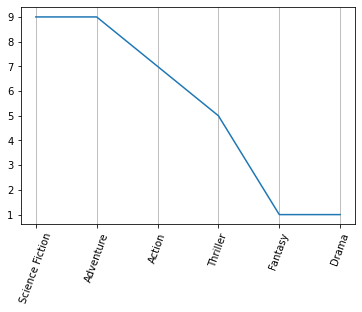

In [114]:
pvgf(pvg)

<a id='mpm'></a>
<h2> What's the most popular movie, year by year. </h2>

In [98]:
mpm = pd.DataFrame(columns=['id','imdb_id','popularity','budget','revenue',
'original_title','cast','homepage','director','tagline','keywords','overview',
'runtime','genres','production_companies','release_date','vote_count',
'vote_average','release_year','budget_adj','revenue_adj']).set_index('popularity')

for i in np.sort(df['release_year'].unique()):
    mpm = pd.concat([mpm, df[df['release_year'] == i].set_index('popularity').sort_index(axis = 0, ascending = False).head(1)])

mpm #most popular movie

,id,imdb_id,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,,,,,,,,,,,,,,,,,,,,
2.610362,539,tt0054215,806948,32000000,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,NaN,Alfred Hitchcock,The master of suspense moves his cameras into ...,hotel|clerk|arizona|shower|rain,When larcenous real estate clerk Marion Crane ...,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960,5.949601e+06,2.359350e+08
2.631987,12230,tt0055254,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,NaN,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,puppy|animation|dog|dalmatian,When a litter of dalmatian puppies are abducte...,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,1/25/61,913,6.6,1961,2.917944e+07,1.574815e+09
3.170651,646,tt0055928,1100000,59600000,Dr. No,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,http://www.mgm.com/view/movie/566/Dr.-No/,Terence Young,NOW meet the most extraordinary gentleman spy ...,london|england|assassination|spy|casino,"In the film that launched the James Bond saga,...",110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),10/4/62,560,6.7,1962,7.929294e+06,4.296236e+08
2.508235,657,tt0057076,2500000,78898765,From Russia With Love,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,http://www.mgm.com/view/movie/717/From-Russia-...,Terence Young,The world's masters of murder pull out all the...,venice|london|terror|england|assassination,Agent 007 is back in the second installment of...,115,Action|Thriller|Adventure,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,10/11/63,458,6.7,1963,1.780045e+07,5.617734e+08
3.153791,658,tt0058150,3500000,124900000,Goldfinger,Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...,http://www.mgm.com/view/movie/760/Goldfinger/,Guy Hamilton,Everything he touches turns into excitement!,secret organization|secret intelligence servic...,Special agent 007 (Sean Connery) comes face to...,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),9/17/64,602,7.0,1964,2.460594e+07,8.780804e+08
1.910465,660,tt0059800,11000000,141195658,Thunderball,Sean Connery|Claudine Auger|Adolfo Celi|Lucian...,http://www.mgm.com/view/movie/2009/Thunderball/,Terence Young,Look up! Look down! Look out!,paris|florida|fighter pilot|sanatorium|secret ...,A criminal organization has obtained two nucle...,130,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),12/16/65,331,6.3,1965,7.612620e+07,9.771535e+08
1.227582,13377,tt0060345,315000,0,How the Grinch Stole Christmas!,Boris Karloff|June Foray|Thurl Ravenscroft|Dal...,NaN,Chuck Jones|Ben Washam,"You're a mean one, Mr. Grinch",holiday|based on novel|monster|obsession|santa...,"Bitter and hateful, the Grinch is irritated at...",26,Animation|Family|Comedy,MGM Television|The Cat in the Hat Productions,12/18/66,286,7.1,1966,2.116175e+06,0.000000e+00
2.550704,9325,tt0061852,4000000,205843612,The Jungle Book,Phil Harris|Sebastian Cabot|Louis Prima|George...,NaN,Wolfgang Reitherman,The Jungle is JUMPIN'!,indian|snake|lion|musical|feral child,The Jungle Book follows the ups and downs of t...,78,Family|Animation|Adventure,Walt Disney Pictures,10/18/67,928,7.0,1967,2.614705e+07,1.345551e+09
3.309196,62,tt0062622,12000000,56715371,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,NaN,Stanley Kubrick,An epic drama of adventure and exploration,moon|jupiter|artificial intelligence|man vs ma...,Humanity finds a mysterious object buried bene...,149,Science Fiction|Mystery|Adventure,Stanley Kubrick Productions|Metro-Goldwyn-Maye...,4/5/68,1708,7.7,1968,7.522756e+07,3.555466e+08


<a id='pvg'></a>
<h2> Properties associated with high revenue movies. </h2>

**Taking Inflation into Account**

<h3> Top 50 movies with highest revenue. </h3>

In [104]:
rrdf = df.set_index('revenue_adj').sort_index(axis=0, level=None, ascending=False).head(50)
rrdf #revenue related dataframe

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj
revenue_adj,,,,,,,,,,,,,,,,,,,,
2.827124e+09,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,2.408869e+08
2.789712e+09,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,http://www.starwars.com/films/star-wars-episod...,George Lucas,"A long time ago in a galaxy far, far away...",android|galaxy|hermit|death star|lightsaber,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,3.957559e+07
2.506406e+09,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,shipwreck|iceberg|ship|panic|titanic,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,2.716921e+08
2.167325e+09,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,http://theexorcist.warnerbros.com/,William Friedkin,Something almost beyond comprehension is happe...,exorcism|holy water|religion and supernatural|...,12-year-old Regan MacNeil begins to adapt an e...,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1113,7.2,1973,3.928928e+07
1.907006e+09,578,tt0073195,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,http://www.jaws25.com/,Steven Spielberg,Don't go in the water.,fishing|atlantic ocean|bathing|shipwreck|polic...,An insatiable great white shark terrorizes the...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1415,7.3,1975,2.836275e+07
1.902723e+09,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08
1.791694e+09,601,tt0083866,2.900556,10500000,792910554,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,http://www.et20.com/,Steven Spielberg,He is afraid. He is alone. He is three million...,farewell|homesickness|nasa|extraterrestrial te...,A science fiction fairytale about an extra-ter...,115,Science Fiction|Adventure|Family|Fantasy,Universal Pictures|Amblin Entertainment,4/3/82,1830,7.2,1982,2.372625e+07
1.583050e+09,1642,tt0113957,1.136610,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,NaN,Irwin Winkler,Her driver's license. Her credit cards. Her ba...,cheating|new identity|computer virus|chase|com...,Angela Bennett is a freelance software enginee...,114,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,7/28/95,201,5.6,1995,3.148127e+07
1.574815e+09,12230,tt0055254,2.631987,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,NaN,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,puppy|animation|dog|dalmatian,When a litter of dalmatian puppies are abducte...,79,Adventure|Animation|Comedy|Family,Walt Disney Productions,1/25/61,913,6.6,1961,2.917944e+07


<h3> Properties like gnere, keywords, runtime, production company, cast, and director can be analyzed graphically using the previously defined functoin (pvgf) to avoid repeating code. </h3>

<h3> The most profit making genres. </h3>

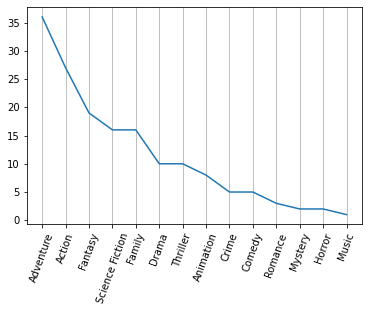

In [115]:
pvgf(rrdf['genres'])

<h3> The most profit making directors. </h3>

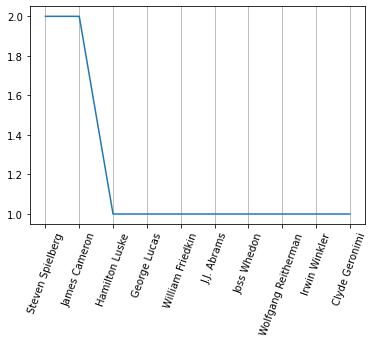

In [120]:
pvgf(rrdf['director'].head(10))

<h3> Frequently used keywords that describes high revenue movies. </h3>

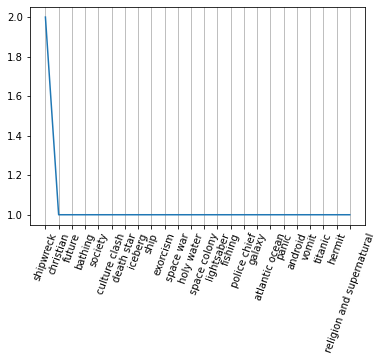

In [137]:
pvgf(rrdf['keywords'].head(5))

<h3> The most profit making production companies. </h3>

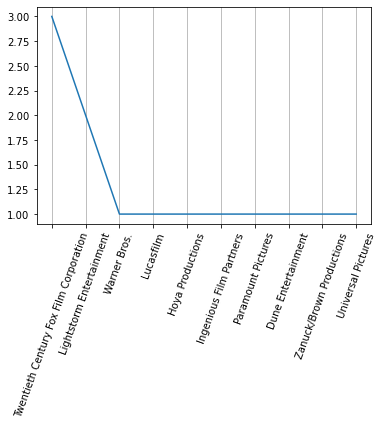

In [145]:
pvgf(rrdf['production_companies'].head(5))